In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-06-25 13:58:26.782075: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-25 13:58:26.783147: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 13:58:26.804033: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 13:58:26.804391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 13:58:27.233516: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Num GPUs Available:  0


2023-06-25 13:58:27.779925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-25 13:58:27.780163: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, \
    MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

model = Sequential([
    Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=75,
                    verbose=1)

Epoch 1/5
800/800 [==============================] - 5s 6ms/step - loss: 0.1447 - accuracy: 0.9549
Epoch 2/5
800/800 [==============================] - 5s 6ms/step - loss: 0.0444 - accuracy: 0.9861
Epoch 3/5
800/800 [==============================] - 5s 6ms/step - loss: 0.0323 - accuracy: 0.9897
Epoch 4/5
800/800 [==============================] - 5s 6ms/step - loss: 0.0244 - accuracy: 0.9922
Epoch 5/5
800/800 [==============================] - 5s 6ms/step - loss: 0.0199 - accuracy: 0.9936


In [5]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Accuracy =', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9921
Accuracy = 0.9921000003814697


1/1 [==============================] - 0s 26ms/step


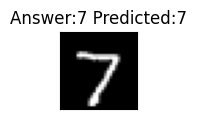

1/1 [==============================] - 0s 12ms/step


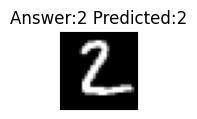

1/1 [==============================] - 0s 9ms/step


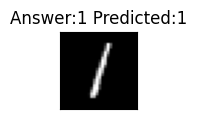

1/1 [==============================] - 0s 9ms/step


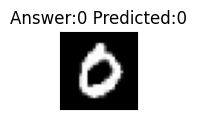

1/1 [==============================] - 0s 9ms/step


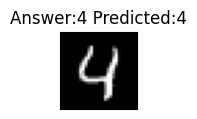

1/1 [==============================] - 0s 8ms/step


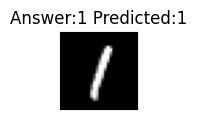

1/1 [==============================] - 0s 8ms/step


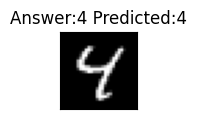

1/1 [==============================] - 0s 8ms/step


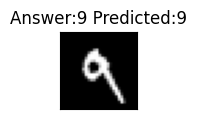

1/1 [==============================] - 0s 8ms/step


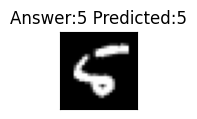

1/1 [==============================] - 0s 8ms/step


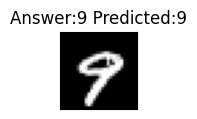

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure(figsize=(1,1))

    score = model.predict(x_test[i].reshape(1, 28, 28, 1))
    predicted = np.argmax(score) 
    answer = np.argmax(y_test[i])
    plt.title('Answer:' + str(answer) + ' Predicted:' + str(predicted))
    
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.show()